# Gentle Introduction to Neural Network

## Artificial Neural Networks

A neural network algorithm contains the following items: 

**Architecture**. The architecture specifies what variables are involved in the network and their topological relationships – for example, the variables involved in a neural net might be the `weights` of the connections between the neurons, along with the activities of the `neurons`.

**Activity rule**. Most neural network models have short time-scale dynamics: local rules define how the activities of the neurons change in response to each other. Typically the activity rule depends on the `weights` (the parameters) in the network.

**Learning rule**. The learning rule specifies the way in which the neural network’s `weights` change with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of target values supplied by a teacher and on the current value of the weights.


## A single neuron

While the behavior of a large network of neurons is complex and intricate, we can easily understand the basic guiding principles by looking at a single neuron. Same as most complex systems, the behavior of the whole cannot be easily understood by knowing how a single component of the network operates. However, this will give us very valuable information and guide our intuition.

We will study a single neuron for two reasons. First, many neural network models are built out of single neurons, so it is good to understand them in detail. And second, a single neuron is itself capable of ‘learning’ – indeed, various standard statistical methods can be viewed in terms of single neurons – so this model will serve as a first example of a supervised neural network.

### Definition of a single neuron

**Architecture**. A single neuron has a number $I$ of inputs $x_i$ and one output which we will here call $y$. (See figure below) Associated with each input is a weight $w_i (i = 1,\cdots, I)$. There may be an additional parameter $w_0$ of the neuron called a bias which we may view as being the weight associated with an input $x_0$ which is permanently set to $1$. The single neuron is a feedforward device – the connections are directed from the inputs to the output of the neuron.

**Activity rule**. The activity rule has two steps.

1. First, in response to the imposed inputs x, we compute the activation of the neuron, $$ a =   \sum_i w_ix_i, $$ where the sum is over $i = 0,\cdots,I$ if there is a bias and $i = 1,\cdots,I$ otherwise.

2. Second, the output $y$ is set as a function $f(a)$ of the activation. The output is also called the activity of the neuron, not to be confused with the activation $a$. There are several possible activation functions; here are the most popular (We only list deterministic activation functions):
    
    - Linear: $$y(a) = a.$$
    
    - Sigmoid (logistic function): $$ y(a) = \frac{1}{1+e^{-a}} $$
    
    - Sigmoid: $$ y(a) = \tanh(a) = \frac{e^a - e^{-a}}{e^a + e^{-a}}$$
    
    - Relu: $$ y(a) = \max(0, a) $$
    - softmax (suitable for classification): $$ y(a) = \frac{e^{z_i}}{\sum_{k=1}^{N}e^{z_k}}$$
        
<img src="img/neuron.png" style="width: 250px;"/>
<center> Figure 1, Single neuron with weights $w$ and bias $w_0$</center>

# Code of Single Neuron: Classfier
Let us try to build up a single neuron to solve a simple problem of `binary classifier`. Suppose we have a series of two-dimensional points, which belongs to either class 1 or 2. How can we classify them automatically. 
Below is the dataset and how it looks like.

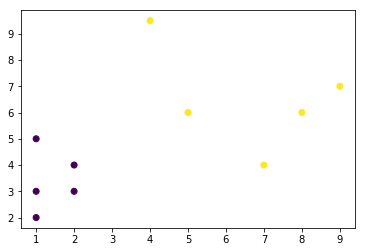

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([[1,2],[1,3],[1,5],[2,3],[2,4],[7,4],[5,6],[8,6],[9,7],[4,9.5]])
Y = np.array([0,0,0,0,0,1,1,1,1,1])
plt.scatter(x[:,0],x[:,1], c=Y)
plt.show()

# Code details of the Single Neuron model: 
- `Architecture`: We just need to set a single Neuron model. Since each sample has two data, we will have two weights (`w`) and one bias (`b`) for this model, so that the output is $$ y0 = w\cdot x + b$$
- `Activation function`: Let us just use the sigmoid function so that the final output is $$ f(x,w,b) = \frac{1}{1+e^{-(w \cdot x+b)}} $$

- `Cost function`: Our goal is to find the parameters (`w` and `b`) which lead to the lowest cost function.
$$ E(w, b) = \frac{1}{2}\sum_{n=1}^N (f_n(x_n,w,b) - y_n)^2$$
where `n` loops over all samples.
- `Learning rules`: In order to minimize the cost function, we need to update `w` and `b` iteratively accroding to the gradient descent algorithm. For this we will need to know how to calculate the gradident of the cost function with respect to `w` and `b`. For doing this, we need to apply the chain rule:
$$ \frac{\partial E}{\partial w_j} = \frac{\partial E}{\partial f} \frac{\partial f}{\partial y0} \frac{\partial y0} {\partial w} = −\sum_{n=1}^N (y_n − f_n) \cdot y_n \cdot (1-y_n) \cdot x_n$$
$$ \frac{\partial E}{\partial b} = \frac{\partial E}{\partial f} \frac{\partial f}{\partial y0} \frac{\partial y0} {\partial b} = −\sum_{n=1}^N (y_n − f_n) \cdot y_n \cdot (1-y_n) $$


In [2]:
"""
Single Neuron Regression Model
"""
def singleNeuron(x, Y, learning_rate=1e-1, decay_rate=0.999, max_iter = 1000):
    #Initialize the weight/bias
    w0 = np.array([1,1])
    b0 = 0
    #here we create a list to track the evolution of w/bs
    w_hist = np.zeros([max_iter,3])

    for i in range(max_iter):
        #forward
        y0 = np.dot(x,w0)+b0
        y = sigmoid(y0)

        #calculate and print the loss
        if i%1000==0:
            print('loss function at {:4d}: {:6.4f} '.format(i, cost(y, Y)))  
            
        #backpropagation
        g_output = y-Y
        g_activation = y*(1-y)
        tmp = g_output*g_activation
        gw = np.dot(tmp,x) #element wise multiplication
        gb = np.sum(tmp)
        
        #update the w/b
        w0 = w0 - learning_rate*(decay_rate**i)*gw
        b0 = b0 - learning_rate*(decay_rate**i)*gb
        w_hist[i,:] = np.array([b0, w0[0], w0[1]])
        
    return w_hist

def sigmoid(v):
    return 1./(1+np.exp(-v))

def cost(y, y0):
    return 0.5*np.sum(np.power(y-y0,2))

def predict(x, w):
    b = w[0]
    w0 = w[1:]
    return sigmoid(b + np.dot(x, w0))

w_hist = singleNeuron(x, Y)
predict(x, w_hist[-1])

loss function at    0: 2.4243 


array([0.03503001, 0.04340563, 0.06619965, 0.13181369, 0.15950504,
       0.9875923 , 0.91740562, 0.9976025 , 0.99942571, 0.87875465])

## Analyze the results
We can understand the results by the following analytics:
- check the progress of the learning, i.e, how the loss function progress
- for a single neuron layer model, we are actually attempting to draw a decision boundary between class 1 and 2. Therefore, we can visualize this boundary

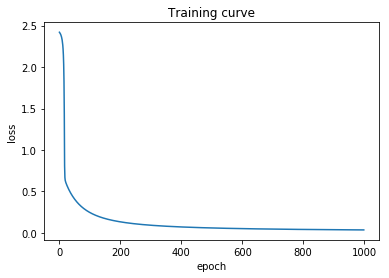

In [3]:
# To monitor the progress of training
loss = []
for w in w_hist:
    y = predict(x, w)
    loss.append(cost(y, Y))
plt.title('Training curve')
plt.plot(range(len(loss)), loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

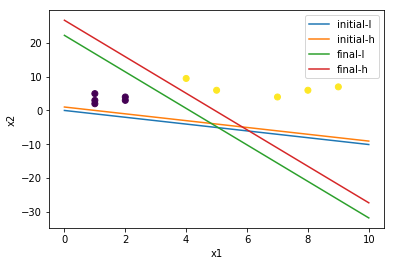

In [6]:
# To draw the decision boundary

def line1(x, w):
    return (-w[0] - x*w[1])/w[2]
def line2(x, w):
    return (1-w[0] - x*w[1])/w[2]

plt.scatter(x[:,0],x[:,1], c=Y)

x0 = np.linspace(0,10,20)
y0 = line1(x0, w_hist[0])
y1 = line2(x0, w_hist[0])
plt.plot(x0, y0, label='initial-l')
plt.plot(x0, y1, label='initial-h')

#y0 = line1(x0, w_hist[int(len(w_hist)/2)])
#y1 = line2(x0, w_hist[int(len(w_hist)/2)])
#plt.plot(x0, y0, label='middle-l')
#plt.plot(x0, y1, label='middle-h')


y0 = line1(x0, w_hist[-1])
y1 = line2(x0, w_hist[-1])
plt.plot(x0, y0, label='final-l')
plt.plot(x0, y1, label='final-h')


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Comments
So far we have learned how to build a single neuron model to predict the values for an arbitray set of data. It works! However, this is not an optimal solution. What we did is actually to predict the values in a continous range. But for this perticular problem, our target values are either 0 or 1, which is a classification problem. Hence the following items can be improved:
- `cost function`: Previsouly, we simply calculate the sum of squred difference, which is commonly called `MSE` loss function and used in the regression problem. For classification, a good choice is `log_loss`. 
$$ L = \frac{1}{n} \sum_{i=1}^n [y_i log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$$
```python
def logloss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -log(p)
    else:
        return -log(1 - p)
```
- `activation function`: Relu

To increase the complexity further, let's do another model by doing classification for 3 different classes.